## Visualization of Scores Data with the Crowdmark API

[Crowdmark API Guide (under development)](https://crowdmark-api-docs.surge.sh)

Goals: Use the Crowdmark API to

1. Extract scores from an assessment
2. Visualize scores:
    + correlation matrix
    + heat map
    + distribution
    + pairwise distribution

In [1]:
## Some math and data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import seaborn for visualizing data graphically
import seaborn as sns
sns.set()

In [3]:
## For graphing in this notebook
%matplotlib inline

## Enter your Crowdmark API key

In [ ]:
## Execute this cell to generate a request for your API key.
## Paste your api key into the text field (and press enter); Comment out the next line to define your API Key.
# api = input("What is your Crowdmark API key:")

In [ ]:
## This cell writes the content of `api` to the file .crowdmark-key.
## Comment out the next two lines to write the api entered in cell above 
## to the file .crowdmark-key in current directory.

# with open(".crowdmark-key", "w") as text_file:
#   print(f"{api}", file=text_file)

In [7]:
# This cell reads in the .crowdmark-key file and saves it as apiKey.
# The API key allows the computer hosting your Jupyter notebook to programmatically access data from Crowdmark.
with open(".crowdmark-key", 'r') as f:
    apiKey = f.read().rstrip()
# apiKey

In [4]:
## Define the URL endpoint for accessing the booklets data from the Crowdmark API.
cm = 'https://app.crowdmark.com'

## Connect to Scores Data on Crowdmark

### Specifying the Assessment for Analysis

![assessment_slug](https://wwejubwfy.s3.amazonaws.com/WUSTL_Demonstration_Assessment__Crowdmark_2017-01-07_15-58-14.png)

In [5]:
# Define the assessment to investigate.
# Select the assessment slug from inside the URL from the assessment's dashboard on Crowdamrk.
# https://app.crowdmark.com/exams/<assessment-slug>/dashboard
assessment_slug = 'math-sample-assessment-fe8c2'


In [8]:
#URL for API, Crowdmark API URL in this case
url = 'https://app.crowdmark.com/api/assessments/' + assessment_slug + '/results.csv' + '?api_key=' + apiKey

In [9]:
# Download the CSV data from the Crowdmark URL and store as a Pandas Dataframe
data = pd.read_csv(url)

## Explore Data

In [10]:
# Show the columns in the data set.
# Sometimes, the `First Name` fields that appear later need to be edited to `Name`.
data.columns

Index(['Crowdmark ID', 'Score URL', 'Email', 'Name', 'Student ID Number',
       'Section', 'Q1', 'Q2', 'Q3', 'MC-total', 'Total'],
      dtype='object')

In [11]:
# Describe the data set
data.describe()

,Crowdmark ID,Student ID Number,Section,Q1,Q2,Q3,MC-total,Total
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.0,4.000000
mean,5.000000,390243.750000,1.50000,4.000000,4.975000,4.550000,0.0,13.525000
std,3.162278,220666.853095,0.57735,1.154701,3.821322,1.239624,0.0,4.716196
min,2.000000,172997.000000,1.00000,3.000000,2.000000,3.100000,0.0,8.100000
25%,2.750000,247120.250000,1.00000,3.000000,2.000000,3.850000,0.0,10.350000
50%,4.500000,355235.000000,1.50000,4.000000,3.950000,4.550000,0.0,14.000000
75%,6.750000,498358.500000,2.00000,5.000000,6.925000,5.250000,0.0,17.175000
max,9.000000,677508.000000,2.00000,5.000000,10.000000,6.000000,0.0,18.000000


## Localize Data to Score Columns

In [12]:
# Restrict attention to the score columns for detailed visualization
# Cut and paste the column labels for the questions from above
df = data[['Q1', 'Q2', 'Q3']]

## Scores Correlation Matrix

In [13]:
corr = df.corr

<AxesSubplot:>

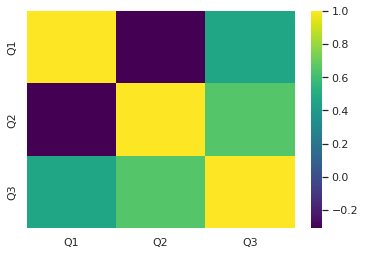

In [14]:
sns.heatmap(corr('pearson'), cmap="viridis")

In [15]:
df.corr()

,Q1,Q2,Q3
Q1,1.000000,-0.309727,0.465746
Q2,-0.309727,1.000000,0.651256
Q3,0.465746,0.651256,1.000000


## Scores Heatmap

<AxesSubplot:>

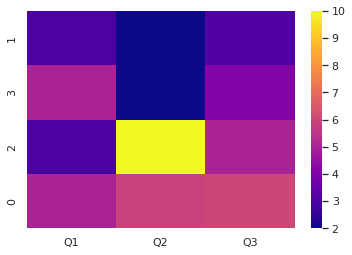

In [16]:
# Plot a score heatmap sorted on a specific column
sns.heatmap(df.sort_values(by=['Q3']), cmap="plasma")

In [17]:
df.columns

Index(['Q1', 'Q2', 'Q3'], dtype='object')

## Scores Distribution

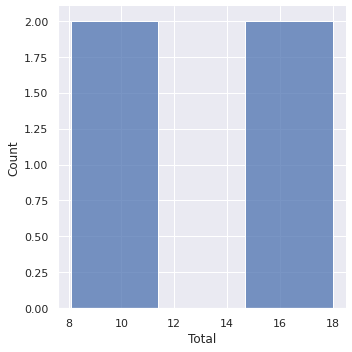

In [27]:
sns.displot(data['Total'])

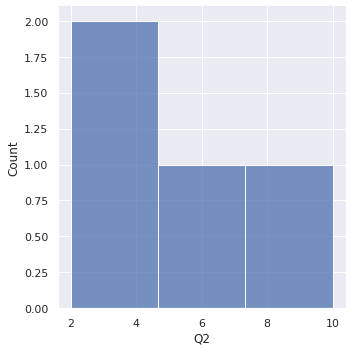

In [28]:
sns.displot(data['Q2'])

## Pairwise Relationships

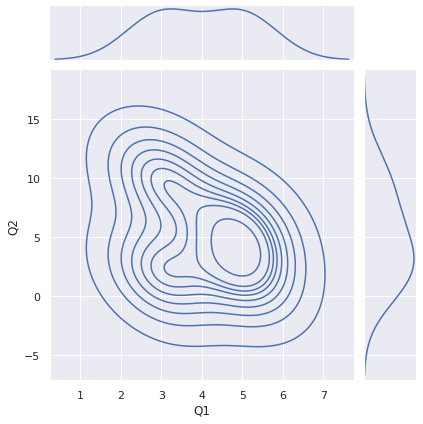

In [29]:
sns.jointplot(x=data['Q1'], y=data['Q2'], kind = "kde")

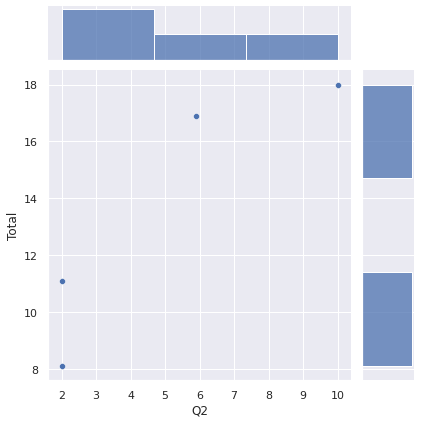

In [30]:
sns.jointplot(x=data['Q2'], y=data['Total'])

## Pivot Table

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(data)